Dataset from pro-football-reference.com contains every draft pick since 1936.
Bottom teams of the previous season have the right to pick players first -> We can assume that players picked in round 1&2 were outstanding college players

Question: How are players picked in first and second round distributed between states?

In the last 20 years notable amount of  top-notch players went to colleges in Texas (80-100),California & Alabama (120-140) and Florida (120-140).
Between 40-60 Players came from Oklahoma, Louisiana, North Carolina, South Carolina, Michigan, Georgia, Tennessee, Indiana and Ohio whereas only 0-20 Players from colleges in the east of the US were picked in round 1 & 2. 
This is especially noteworthy, as Massachusetts is the home of the New England Patriots, one oft the most successful NFL teams.

In the next step we try to gain some deeper insights and identify potential outliers by aggregating over 3 years for draft rounds from 2000-2020

Installing package into 'C:/Users/mariu/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mariu\AppData\Local\Temp\RtmpcFWBEz\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'geojsonio'


The following object is masked from 'package:base':

    pretty


Loading required package: sp

rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: C:/Users/mariu/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: C:/Users/mariu/Documents/R/win-library/4.0/rgdal/proj
Linking to sp version:1.4-2
To mute warnings o

package 'mapproj' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mapproj'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\mariu\Documents\R\win-library\4.0\00LOCK\mapproj\libs\x64\mapproj.dll nach C:\Users\mariu\Documents\R\win-library\4.0\mapproj\libs\x64\mapproj.dll zu kopieren: Permission denied"
Warning message:
"restored 'mapproj'"



The downloaded binary packages are in
	C:\Users\mariu\AppData\Local\Temp\RtmpcFWBEz\downloaded_packages


Loading required package: maps


Attaching package: 'maps'


The following object is masked from 'package:purrr':

    map


Installing package into 'C:/Users/mariu/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'gganimate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mariu\AppData\Local\Temp\RtmpcFWBEz\downloaded_packages


Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_double(),
  Player = col_character(),
  Pos = col_character(),
  Tm = col_character(),
  `Passing QBrec` = col_character(),
  Sk = col_character(),
  `College/Univ` = col_character(),
  `College Stats` = col_character(),
  State = col_character()
)

See spec(...) for full column specifications.



State,n
<chr>,<int>
Alabama,101
Arizona,19
Arkansas,15
California,109
Colorado,16
Connecticut,7
Delaware,2
District of Columbia,1
Florida,136


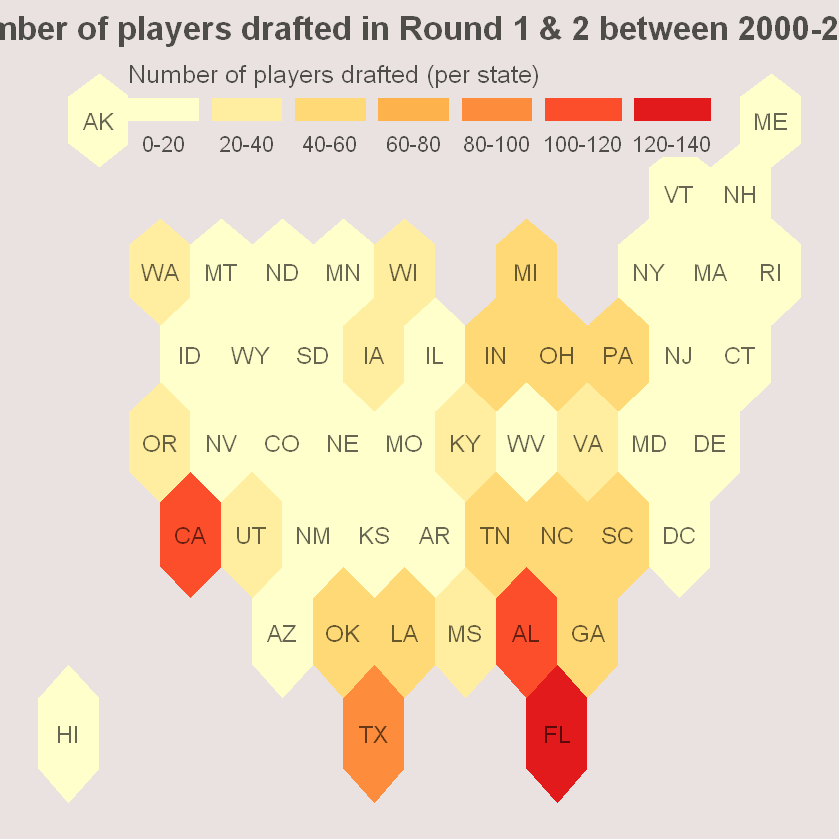

In [1]:
install.packages("tidyverse")
library(tidyverse)
library(ggplot2)
library(geojsonio)
library(rgdal)
library(broom)
library(rgeos)
install.packages("mapproj")
library(mapproj)
install.packages("gganimate")
library(gganimate)

college_draft_v2 <- read_csv2("https://raw.githubusercontent.com/michiWS1920/nfl_data/master/college_draft_v2.csv")
#loading and cleaning draft data
draft_all <- college_draft_v2 %>%
filter(!State %in% c("Germany", "Army", "Air Force", "Navy", "Canada", "Australia"), Rnd %in% c(1,2)) %>% #filtering for players that were drafted in Round 1&2 from colleges in the US
group_by(State) %>%
count(State) %>% #counting no. of players drafted from each state
ungroup()

draft_all
spdf <- geojson_read("https://raw.githubusercontent.com/mrsbrn/test/master/data.geojson",  what = "sp")
spdf@data = spdf@data %>%
  mutate(google_name = gsub(" \\(United States\\)", "", google_name))


spdf@data = spdf@data %>% mutate(google_name = gsub(" \\(United States\\)", "", google_name))
spdf_fortified <- tidy(spdf, region = "google_name")
centers <- cbind.data.frame(data.frame(gCentroid(spdf, byid=TRUE), id=spdf@data$iso3166_2))

spdf@data = spdf@data %>% mutate(google_name = gsub(" \\(United States\\)", "", google_name))
spdf_fortified <- tidy(spdf, region = "google_name")


#joining geojson and draft data
spdf_fortified_all <- spdf_fortified %>%
  left_join(. , draft_all, by=c("id"="State")) %>%
  mutate_if(is.numeric, list(~ifelse(is.na(.), 0, .)))

spdf_fortified_all$bin <- cut(spdf_fortified_all$n, breaks=seq(0,140, by=20),labels = c("0-20","20-40","40-60","60-80","80-100","100-120","120-140"), include.lowest = TRUE )


colors= c("0-20"="#FFFFCC","20-40"="#FFEDA0","40-60"="#FED976","60-80"="#FEB24C","80-100"="#FD8D3C","100-120"="#FC4E2A","120-140"="#E31A1C") #selecting colors for different bins



ggplot() +
  geom_polygon(data = spdf_fortified_all, aes(fill = bin , x = long, y = lat, group = group) , size=0, alpha=1) +
  geom_text(data=centers, aes(x=x, y=y, label=id), color="black", size=5, alpha=0.6) +
  theme_void() +
  scale_fill_manual(limits=c("0-20","20-40","40-60","60-80","80-100","100-120","120-140"), name= "Number of players drafted (per state)",
                    values=colors,guide = guide_legend( keyheight = unit(5, units = "mm"), keywidth=unit(15, units = "mm"), label.position = "bottom", title.position = "top", nrow=1)) +
  labs(title= "Number of players drafted in Round 1 & 2 between 2000-2020")+
  theme(
    legend.position = c(0.5, 0.91),
    plot.title = element_text(size= 20, face="bold", hjust=0.5, color = "#4e4d47", margin = margin(b = -0.1, t = 0.4, l = 2, unit = "cm")),
    legend.title= element_text(size=15, color = "#4e4d47"),
    legend.text=element_text(size=13, color = "#4e4d47"),
    plot.background = element_rect(fill = "#eae2e1", color = NA), 
    panel.background = element_rect(fill = "#eae2e1", color = NA), 
    legend.background = element_rect(fill = "#eae2e1", color = NA))

In [3]:
library(geojsonio)
library(rgdal)
library(broom)
library(rgeos)
install.packages("mapproj")
library(mapproj)
install.packages("gganimate")
library(gganimate)


#loading and cleaning draft data
draft <- college_draft_v2 %>%
  filter(!State %in% c("Germany", "Army", "Air Force", "Navy", "Canada", "Australia"), Rnd %in% c(1,2)) %>% #filtering for players that were drafted in Round 1&2 from colleges in the US
  group_by(Year, State) %>%
  count(State) %>% #counting no. of players drafted from each state
  ungroup()
draft

draft_clean <- draft %>% pivot_wider(names_from=Year, values_from=n) %>%
  select(State, "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020") %>% #converting data from long to wide format and reordering columns
  mutate_if(is.numeric, list(~ifelse(is.na(.), 0, .))) %>%  #set number of players drafted to 0, if none players were drafted (instead of NA)
  mutate("2000-2002"=rowSums(.[2:4]), "2003-2005"=rowSums(.[5:7]),"2006-2008"=rowSums(.[8:10]),"2009-2011"=rowSums(.[11:13]),"2012-2014"= rowSums(.[14:16]),"2015-2017"=rowSums(.[17:19]),"2018-2020"=rowSums(.[20:22])) %>% #aggregate over 3 years
  select(State,"2000-2002","2003-2005","2006-2008","2009-2011","2012-2014","2015-2017","2018-2020") %>% 
  add_row(State= c("Alaska", "District of Columbia","Maine","Montana","New Hampshire","North Dakota","Rhode Island","Vermont","Wyoming"),"2000-2002"=0, "2003-2005"=0, "2006-2008"= 0, "2009-2011"= 0, "2012-2014"=0,"2015-2017"=0, "2018-2020"=0) #add rows for states were no players were drafted, as gganimate cannot handle N/A
         
draft_clean

draft_long <- draft_clean %>%
pivot_longer(-State, names_to="years",values_to="number") %>% #convert back to long format, as gganimate cannot handle wide format
arrange(years)
draft_long

#joining geojson and draft data
spdf_fortified_detail <- spdf_fortified %>%
  left_join(. , draft_long, by=c("id"="State")) %>%
  mutate_if(is.numeric, list(~ifelse(is.na(.), 0, .)))


#customizing heatmap
#binning of draft numbers
spdf_fortified_detail$bin <- cut(spdf_fortified_detail$number,breaks=seq(0,27, by=3),labels=c("0-3","4-6","7-9","10-12","13-15","16-18","19-21","22-24","25-27"), include.lowest = TRUE )


colors= c("0-3"="#FFFFCC","4-6"="#FFEDA0","7-9"="#FED976","10-12"="#FEB24C","13-15"="#FD8D3C","16-18"="#FC4E2A","19-21"="#E31A1C","22-24"="#BD0026","25-27"="#800026") #selecting colors for different bins

#plotting and animating data
p <- ggplot() +
  geom_polygon(data = spdf_fortified_detail, aes(fill = bin, x = long, y = lat, group = group) , size=0, alpha=1) +
  geom_text(data=centers, aes(x=x, y=y, label=id), color="black", size=5, alpha=0.6) +
  theme_void() +
  scale_fill_manual(limits=c("0-3","4-6","7-9","10-12","13-15","16-18","19-21","22-24","25-27"), name= "Number of players drafted (per state)",
    values=colors,guide = guide_legend( keyheight = unit(5, units = "mm"), keywidth=unit(15, units = "mm"), label.position = "bottom", title.position = "top", nrow=1)) +
  labs(title= "Number of players drafted in Round 1 & 2 between: {current_frame}")+
  theme(
    legend.position = c(0.5, 0.91),
    plot.title = element_text(size= 20, face="bold", hjust=0.5, color = "#4e4d47", margin = margin(b = -0.1, t = 0.4, l = 2, unit = "cm")),
    legend.title= element_text(size=15, color = "#4e4d47"),
    legend.text=element_text(size=13, color = "#4e4d47"),
    plot.background = element_rect(fill = "#eae2e1", color = NA), 
    panel.background = element_rect(fill = "#eae2e1", color = NA), 
    legend.background = element_rect(fill = "#eae2e1", color = NA)) +
    transition_manual(years)

animate(p, fps=3, height = 800, width = 1200)


Warning message:
"package 'mapproj' is in use and will not be installed"
Warning message:
"package 'gganimate' is in use and will not be installed"


Year,State,n
<dbl>,<chr>,<int>
2000,Alabama,4
2000,Arizona,4
2000,Arkansas,2
2000,California,3
2000,Florida,6
2000,Georgia,1
2000,Hawaii,1
2000,Iowa,1
2000,Kansas,1


State,2000-2002,2003-2005,2006-2008,2009-2011,2012-2014,2015-2017,2018-2020
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,9,12,9,14,15,19,23
Arizona,7,1,4,3,1,1,2
Arkansas,3,4,6,0,0,1,1
California,12,17,20,18,18,15,9
Florida,27,26,19,18,14,23,9
Georgia,6,11,2,6,5,3,9
Hawaii,2,2,2,1,0,0,1
Iowa,2,7,1,3,2,1,6
Kansas,3,2,2,2,1,1,1


State,years,number
<chr>,<chr>,<dbl>
Alabama,2000-2002,9
Arizona,2000-2002,7
Arkansas,2000-2002,3
California,2000-2002,12
Florida,2000-2002,27
Georgia,2000-2002,6
Hawaii,2000-2002,2
Iowa,2000-2002,2
Kansas,2000-2002,3


nframes and fps adjusted to match transition



Looking at the four states with the overall highest number of players picked, we can see that all four had relatively high numbers over time with spikes in 2003-2005, 2006-2008, 2009-2011 and 2012-2014 for California where more than 15 players were drafted in the first two rounds.

More than 15 players were also drafted from Florida in 2000-2002, 2003-2005, 2006-2008,2009-2011 and 2015-2017.
As Florida is the state with most first and second round picks over the last 20 years, it is hardly suprising that the highest numbers of players drafted in the seven periods considered were also from Florida with 27 players picked between 2000 and 2003 and 26 players picked between 2003 and 2005.

Texas and Alabama are also among the states with constantly high numbers of first and second round picks with highest numbers between 2009-2014 and 2018-2020 for Texas and 2018-2020 for Alabama. 

While we can observe that a relatively constant number of athletes was picked from North Carolina over the last 20 years, we see that for some states periods with a high number of picks are followed by periods with only a few picks. Looking at Tennesse for example, we see that 14 players were drafted between 2000-2002, followed by only 4 players between 2003-2005, 10 players between 2006-2008 and 4 players between 2009-2011 again. Other states, like Michigan (13 players between 2006-2008 followed by 3 players between 2009-2011) and Georgia (11 players between 2003-2005, 2 players between 2006-2008, 6 players between 2009-2011) show similar patterns. In conclusion, the relatively high numbers form these states stem from some outliers and not a steady output of good college players.

Another notable fact is that only three, respectively five players were drafted from California and Florida in the last three years, making this the period with least drafts for both states, while Alabama peaked in 2018-2020 with 11 players picked. 


Mean Height and Weight of College Drafts over Time

In [ ]:
d <- read.csv("training.csv", sep = ",",stringsAsFactors = F,header = T)
d

In [ ]:
d %>%
    select(year,pos,weight, height) %>%
    mutate(pos = replace(pos, pos %in% c("DE", "DT", "DL", "EDGE", "ILB", "OLB", "LB", "NT"), "D-Line"),
            pos = replace(pos, pos %in% c("SS", "FB", "S", "CB", "FS", "DB"), "D-Back"),
            pos = replace(pos, pos %in% c("C", "G", "OG", "OT", "T", "OL"), "O-Line"),
            pos = replace(pos, pos %in% c("K", "P", "LS"), "Kicker")) %>%
    group_by(year, pos) %>%
    mutate(meanWeight = mean(weight),meanHeight = mean(height)) %>%
    select(year, pos, meanWeight, meanHeight) %>%
    count(meanWeight, meanHeight) -> df

In [ ]:
ggplot(df, aes(x=year, y=meanWeight, color=pos)) + 
    geom_point(size=6)+
    scale_x_continuous(breaks=seq(2000,2020)) +
    labs(title= "Mean Weight of NFL Picks 2000-2020", subtitle="per Position", x="Year", y="mean Weight",color="Position")+
    nfl_theme()
    

In [ ]:
ggplot(df, aes(x=year, y=meanHeight, color=pos)) + 
    geom_point(size=6)+
    scale_x_continuous(breaks=seq(2000,2020)) +
    labs(title= "Mean Height of NFL Picks 2000-2020", subtitle="per Position", x="Year", y="mean Height",color="Position")+
    nfl_theme()
    